In [2]:
import PIL
import scipy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import image as img
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [4]:
U1333A_1H_1_A = img.imread('./Core Images/320-U1333A-1H-1-A_SHLF609451_20090331210504_consumer.jpg')
U1333A_1H_1_A.shape

(29999, 1653, 3)

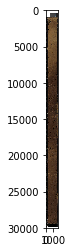

In [12]:
plt.imshow(U1333A_1H_1_A)
plt.show()

In [5]:
U1333A_1H_1_A_trim = img.imread('./Core Images/320-U1333A-1H-1-A_SHLF609451_20090331210504_trim.jpg')
U1333A_1H_1_A_trim.shape

(29999, 1365, 3)

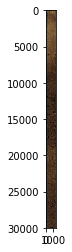

In [13]:
plt.imshow(U1333A_1H_1_A_trim)
plt.show()

In [6]:
U1333A_1H_2_A = img.imread('./Core Images/320-U1333A-1H-2-A_SHLF609481_20090331211246_consumer.jpg')
U1333A_1H_2_A.shape

(29999, 1664, 3)

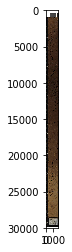

In [14]:
plt.imshow(U1333A_1H_2_A)
plt.show()

In [7]:
U1333A_1H_2_A_trim = img.imread('./Core Images/320-U1333A-1H-2-A_SHLF609481_20090331211246_trim.jpg')
U1333A_1H_2_A_trim.shape

(29999, 1362, 3)

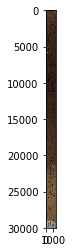

In [15]:
plt.imshow(U1333A_1H_2_A_trim)
plt.show()

In [8]:
U1333A_1H_3_A = img.imread('./Core Images/320-U1333A-1H-3-A_SHLF609511_20090331212452_consumer.jpg')
U1333A_1H_3_A.shape

(29999, 1664, 3)

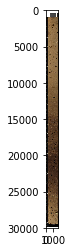

In [16]:
plt.imshow(U1333A_1H_3_A)
plt.show()

In [9]:
U1333A_1H_3_A_trim = img.imread('./Core Images/320-U1333A-1H-3-A_SHLF609511_20090331212452_trim.jpg')
U1333A_1H_3_A_trim.shape

(29932, 1352, 3)

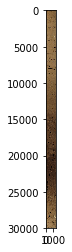

In [17]:
plt.imshow(U1333A_1H_3_A_trim)
plt.show()

In [10]:
U1333A_1H_4_A = img.imread('./Core Images/320-U1333A-1H-4-A_SHLF609541_20090331211812_consumer.jpg')
U1333A_1H_4_A.shape

(29999, 1664, 3)

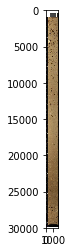

In [18]:
plt.imshow(U1333A_1H_4_A)
plt.show()

In [11]:
U1333A_1H_4_A_trim = img.imread('./Core Images/320-U1333A-1H-4-A_SHLF609541_20090331211812_trim.jpg')
U1333A_1H_4_A_trim.shape

(29956, 1324, 3)

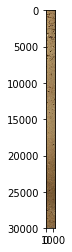

In [19]:
plt.imshow(U1333A_1H_4_A_trim)
plt.show()

In [20]:
r = []
g = []
b = []

for line in U1333A_1H_1_A_trim:

    for pixel in line:

        temp_r, temp_g, temp_b = pixel

        r.append(temp_r)

        g.append(temp_g)

        b.append(temp_b)

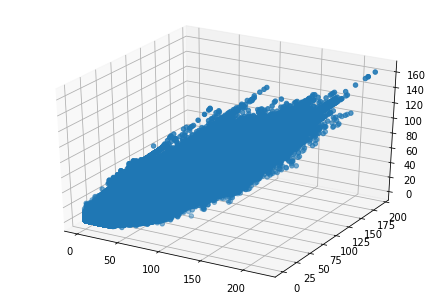

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [22]:
import pandas as pd

df = pd.DataFrame({'red': r, 'blue': b, 'green': g})

In [23]:
from scipy.cluster.vq import whiten

df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])

df.sample(n = 10)

,red,blue,green,scaled_red,scaled_blue,scaled_green
30258213,84,30,54,3.702729,2.555441,2.838535
37810660,72,27,47,3.173767,2.299897,2.470577
16282617,90,45,65,3.967209,3.833161,3.416756
34500426,76,31,51,3.350088,2.640622,2.680839
12571625,58,25,36,2.556646,2.129534,1.892357
160187,117,52,89,5.157372,4.429430,4.678327
34021610,76,31,51,3.350088,2.640622,2.680839
26693337,82,37,57,3.614569,3.151710,2.996232
16501855,59,30,43,2.600726,2.555441,2.260315
34330237,75,36,49,3.306008,3.066529,2.575708


In [24]:
from scipy.cluster.vq import kmeans

cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 2)

In [25]:
#print dominant colors
print(cluster_centers)

[[4.7372346  4.1129185  4.1309178 ]
 [2.91785586 2.27357687 2.39884406]]


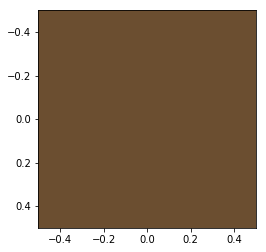

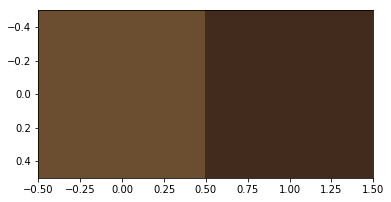

In [26]:
colors = []

r_std, g_std, b_std = df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:

    scaled_r, scaled_g, scaled_b = cluster_center

    colors.append((

        scaled_r * r_std / 255,

        scaled_g * g_std / 255,

        scaled_b * b_std / 255

    ))

    plt.imshow([colors])

    plt.show()

The type of this input is <class 'numpy.ndarray'>
Shape: (29999, 1365, 3)


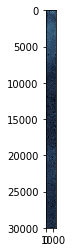

In [28]:
image = cv2.imread('./Core Images/320-U1333A-1H-1-A_SHLF609451_20090331210504_trim.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)


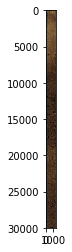

In [29]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

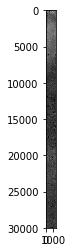

In [30]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

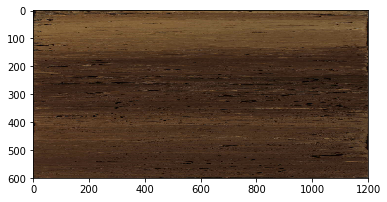

In [34]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [35]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [36]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [37]:
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [39]:
clf = KMeans(n_clusters = 3)
labels = clf.fit_predict(modified_image)

In [40]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

if (show_chart):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)


NameError: name 'show_chart' is not defined

In [ ]:
get_colors(get_image(‘sample_image.jpg’), 8, True)

In [ ]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
view raw

In [ ]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True

In [ ]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True

In [ ]:
# Variable 'selected_color' can be any of COLORS['GREEN'], COLORS['BLUE'] or COLORS['YELLOW']
plt.figure(figsize = (20, 10))
show_selected_images(images, selected_color, 60, 5)
view raw